<a href="https://colab.research.google.com/github/matheusbuniotto/portifolio/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="#"><img src="https://github.com/matheusbuniotto/portifolio/blob/main/logo_vertical.png?raw=true" width='210px' alt="logo" border="0"></a>

#### **Data Science na Prática**
#### *Projeto - Análise de Violência no Rio de Janeiro*
*por Matheus Buniotto*

---


# Analisando a Violência no Rio de Janeiro

![rio de janeiro](https://images.pexels.com/photos/2868242/pexels-photo-2868242.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)


O estado do Rio de Janeiro, rico em belezas naturais, berço do samba e um dos estados mais influentes na cultura brasileira, a partir dos anos 70, passa por um circulo vicioso dramático, que combina diversos problemas socioeconômicos: 
* Perda de participação na economia
* Péssimos indicadores sociais
* ***Aumento da violência***
* Grave desigualdade territorial


Além disso, o estado também passa por graves problemas de gestão e corrupção, o que piora, ainda mais, a situação que já é grave. 
Nessa análise, iremos direcionar os holofotes ao tema da violência no estado. Se tratando de violência, apesar de não estar entre as cidades e estados mais violentos do Brasil, o estado apresenta dados catastróficos. É nesse contexto que iremos análisar os dados abertos sobre a violência, disponilizados pelo Governo Estadual do Estado do Rio de Janeiro.

[Referência: Jornal dos Economistas, Ed. Maio/2018](https://www.corecon-rj.org.br/anexos/B5015AA107369AFF52F95450A7CE9B58.pdf)


## Obtenção dos Dados 
Para realizarmos essa análise da criminalidade do estado do Rio de Janeiro, vamos nos basear nos dados fornecidos públicamente através do Portal [ISPDados](http://www.ispdados.rj.gov.br/). No portal podemos acessar as bases de dados de registros criminais e de atividade policialno estado. 

As estatísticas divulgadas no site são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL). Os Registros de Ocorrência são submentidos ao controle de qualidade relizadoos pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civial, e após isso, são consolidados no ISP.

Nessa análise utilizaremos o *dataset* que ppode ser baixado aqui: [Violência no Rio de Janeiro](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv)


### Importando os dados e as biblioteca
Importanto as bibliotecas que iremos utilizar no projeto e os dados que iremos usar.


In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

In [ ]:
#analisando o tamanho do data frame
print('Nosso conjunto de dados possui', df.shape[0], 'entradas e', df.shape[1], 'variáveis.' )

Nosso conjunto de dados possui 344 entradas e 56 variáveis.


In [ ]:
#verificar os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Agora, já conhecemos os nomes de nossas colunas, vamos verificar os tipos dos dados para que possamos trabalhar em nossa análise.

In [ ]:
#verificar o tipo dos dados
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Já conhecemos a estrutura básica de nosso dataset, agora, vamos verificar as 5 primeiras entradas do nosso dataset para termos uma primeira visão do nosso conjunto de dados.

In [ ]:
#verificando as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
#verificando as 5 últimas entradas
df.tail(8)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
336,2019,1,386,2.0,15,159.0,577,6423,459.0,157.0,2334.0,431,116,3785,740,7454,1328,2,7.0,2414.0,6.0,88.0,19.0,2365,18755,1415,2058,720.0,1581.0,168.0,7992,13934,0.0,129.0,6.0,3125.0,2021,792.0,1077.0,201.0,2810,2915.0,540.0,1266.0,236.0,5902.0,447.0,31,4.0,2.0,0.0,562,11196,3785,69609.0,3
337,2019,2,323,5.0,8,145.0,450,5210,440.0,157.0,2045.0,411,116,3554,645,7000,1356,4,1.0,2111.0,14.0,60.0,14.0,2124,17410,1344,1889,685.0,1613.0,158.0,7315,13004,0.0,144.0,7.0,3089.0,2090,798.0,1126.0,202.0,2556,3072.0,559.0,1392.0,235.0,4904.0,351.0,37,4.0,4.0,0.0,481,10467,3554,64967.0,3
338,2019,3,344,5.0,11,132.0,590,5902,469.0,160.0,2157.0,497,95,3775,638,7734,1532,1,4.0,2626.0,5.0,88.0,16.0,2547,19558,1364,2757,634.0,1889.0,202.0,8549,15395,0.0,159.0,6.0,3004.0,1941,740.0,1053.0,181.0,2470,3026.0,618.0,1392.0,306.0,5571.0,407.0,29,2.0,2.0,0.0,492,11892,3775,72100.0,3
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Percebemos que os dados estão incompletos para o ano de 2019, mais afrente iremos remover o ano de 2019 para que não interfira na nossa análise.

Sabemos que um dos maiores problemas presentes nos conjuntos de dados são em relação à qualidade dos dados. Nessa etapa vamos verificar a quantidade de valores ausentes e nulos em nosso dataset.

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

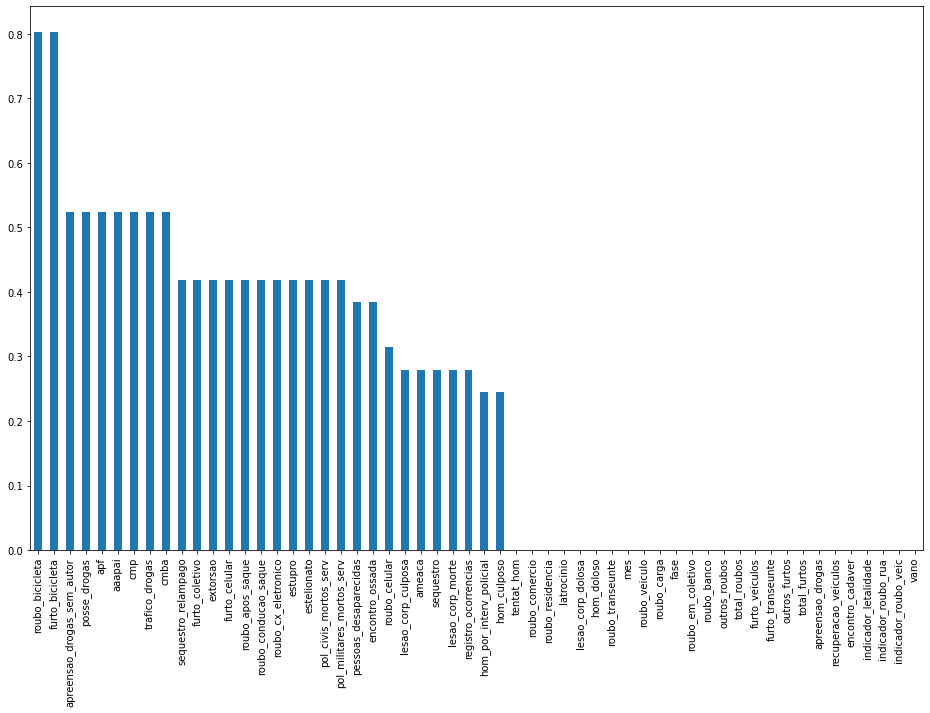

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False).plot(kind='bar', figsize=(16,10));

## Informações Estatísticas da Violência no Rio de Janeiro

Extrairemos algumas informações estatísticas do nosso conjunto de dados. As informações estatísticas, como media, mediana, valores máximos, mínimos e distribuição, vão nos fornecer insighs importantes sobre o tema analisado.

Além disso, podemos verificar se existem alguns dados discrepantes que necessitem um tratamento mais apurado para que não tornem nossos resultados inviesados.  

In [ ]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [ ]:
print('A média de roubos de veículos é de:' ,round(df.roubo_veiculo.mean(),2))
print('A média de furtos de veículos é de:' ,round(df.furto_veiculos.mean(),2))
print('A média de recuperação de veículos é de:' ,round(df.recuperacao_veiculos.mean(),2))

A média de roubos de veículos é de: 2448.7
A média de furtos de veículos é de: 1674.67
A média de recuperação de veículos é de: 1772.24


In [ ]:
#calcular % de carros recuperados

p_carros_recuperados = df.recuperacao_veiculos.sum() / ((df.roubo_veiculo.sum()) + (df.furto_veiculos.sum()))

print("A porcentagem de recuperação de carros roubados e furtados é de {:.2%}.".format(p_carros_recuperados))

A porcentagem de recuperação de carros roubados e furtados é de 42.98%.


In [ ]:
print('A quantidade mínima de homicidios dolosos foi de:', (df.hom_doloso.min()), 'homicidios')
print('A quantidade máxima de homicidios dolosos foi de:', (df.hom_doloso.max()), 'homicidios')

A quantidade mínima de homicidios dolosos foi de: 272 homicidios
A quantidade máxima de homicidios dolosos foi de: 831 homicidios


Vamos verificar quais os meses e ano tiveram a maior quantidade de roubos e furtos no período analisado. Para isso, utilizaremos as entradas máximas para localizar o ano e mês.

In [ ]:
df[df.total_roubos == 23203.000000]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
316,2017,5,425,1.0,20,97.0,504,5190,419.0,188.0,2755.0,669,124,4596,1240,9669,1616,1,12.0,2548.0,7.0,53.0,13.0,2655,23203,1302,1866,813.0,1410.0,243.0,8359,13993,1.0,156.0,17.0,3059.0,1862,610.0,1114.0,182.0,3522,2982.0,639.0,1443.0,128.0,4650.0,379.0,18,4.0,1.0,0.0,543,13833,4596,71895.0,3


In [ ]:
df[df.total_furtos == 18003.000000]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
278,2014,3,510,5.0,10,46.0,544,8357,479.0,214.0,3938.0,773,125,2947,401,7014,639,2,4.0,555.0,16.0,94.0,0.0,1141,13711,1640,4564,974.0,1577.0,0.0,9248,18003,1.0,175.0,17.0,2745.0,2046,871.0,1002.0,228.0,2355,3154.0,1077.0,1533.0,60.0,8154.0,563.0,59,2.0,5.0,0.0,571,8208,2947,72915.0,3


### Informações estatísticas
#### Através de uma breve análise conseguimos extrair informações relevantes do nosso data set, agora, sabemos que:


* A média de roubos de veículos é de: 2448.7
* A média de furtos de veículos é de: 1674.67
* A média de recuperação de veículos é de: 1772.24
* A porcentagem de recuperação de carros roubados e furtados é de 42.98%.
* A quantidade mínima de homicidios dolosos foi de: 272 homicidios
* A quantidade máxima de homicidios dolosos foi de: 831 homicidios
* O mês com a maior quantidade de roubos foi: Abril de 2017, com 23203 roubos.
* O mês com a maior quantidade de furtos foi: Março de 2014, com 18003 roubos.





## Visualização dos Dados
Agora que já conhecemos algumas caracteristicas do nosso conjunto de dados e vimos de forma superficial algumas informações relevantes, vamos transformar nossos dados em informações utilizando gráficos para que possamos facilitar nosso entendimento e análise da Criminalidade no Estado do Rio De Janeiro.





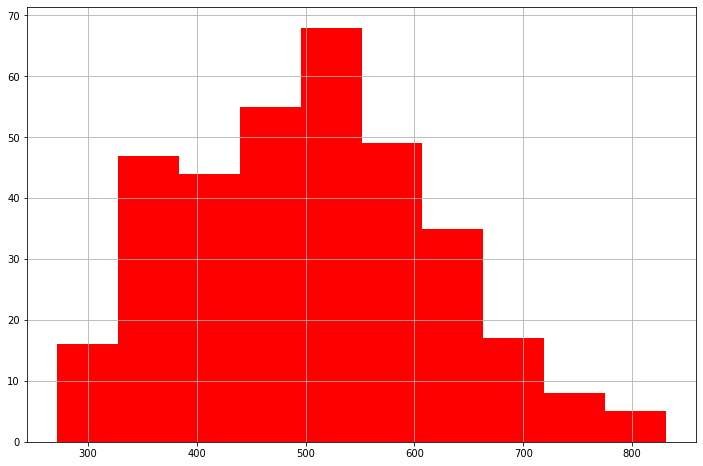

In [ ]:
#histograma hom. doloso
df.hom_doloso.hist(color = 'red', figsize=(12,8));

Através do histograma podemos verificar que:
* Na maioria dos meses, o número de homicídios ficou entre 400 e 600.
* Um número muito baixo (<20) de meses possuem um número menor que 300 homicídios.
* Alguns meses tiveram um número maior que 800 homicídios.
* Quase 70 meses tiveram um número de homicídios entre 500 e 550.




#### Histograma de homicídios dolosos

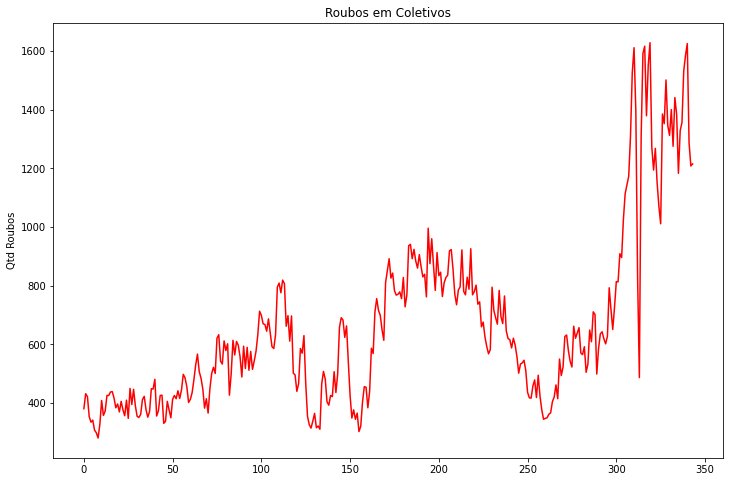

In [ ]:
#roubos em coletivos
df.roubo_em_coletivo.plot(ylabel= 'Qtd Roubos', title='Roubos em Coletivos', color = 'red' , figsize = (12,8));

Os crimes de roubos de coletivo tiveram um pico nos últimos anos. Apesar de apresentarem alguns meses com tendência de queda, a tendência geral é de crescimento.

### Comparativo de Roubos e Furtos

Vamos entender como o cenário de **furtos e roubos** no estado do Rio de Janeiro e a distribuição desses dois tipos de crimes ao longo dos os anos. Mas antes, vamos entender qual é a principal diferença entre eles:

O **crime de furto é descrito como subtração**, ou seja, diminuição do patrimônio de outra pessoa, sem que haja violência. O Código Penal prevê para o furto pena de reclusão de 1 a 4 anos e multa.A lei prevê aumento de pena para quem cometa o crime durante a noite, e para os casos de furto de pequeno valor, permite diminuição ou até perdão de pena, aplicando-se apenas a pena de multa, é o chamado furto privilegiado.

...

O **roubo é crime mais grave**, descrito na lei como subtração mediante grave ameaça ou violência. A pena prevista é de 4 a 10 anos e multa. A lei também prevê aumento de pena para o cometimento de crime sob certas circunstâncias como, utilização de arma, auxílio de mais uma pessoa, restrição de liberdade da vítima, entre outras.

[Fonte: TJDFT](https://www.tjdft.jus.br/institucional/imprensa/campanhas-e-produtos/direito-facil/edicao-semanal/furto-e-roubo#:~:text=Roubo%20e%20furto%20s%C3%A3o%20crimes,pois%20n%C3%A3o%20h%C3%A1%20viol%C3%AAncia%20Ex.&text=O%20roubo%20%C3%A9%20crime%20mais,mediante%20grave%20amea%C3%A7a%20ou%20viol%C3%AAncia.) 



Antes, vamos remover o ano de 2019 do nosso conjunto de dados para que não interfira na nossa análise de roubos e furtos ao longo dos anos.


In [ ]:
df_clean = df.copy()

In [ ]:
df_drop = df_clean.drop(df_clean.index[336:])

In [ ]:
df_drop.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
331,2018,8,360,6.0,13,176.0,535,4655,433.0,157.0,2267.0,535,109,3910,673,7261,1400,2,2.0,2170.0,4.0,62.0,12.0,2620,18760,1398,1553,733.0,1302.0,162.0,6944,12092,0.0,149.0,12.0,3615.0,1994,694.0,1141.0,201.0,3368,3050.0,587.0,1727.0,260.0,4532.0,377.0,24,4.0,2.0,0.0,555,10831,3910,65797.0,3
332,2018,9,382,7.0,14,108.0,509,5344,489.0,157.0,2504.0,463,103,4053,578,6756,1275,1,1.0,2182.0,9.0,160.0,16.0,2385,17982,1339,1419,655.0,1173.0,161.0,6686,11433,0.0,146.0,5.0,2809.0,1959,747.0,1062.0,183.0,2625,2798.0,470.0,1633.0,190.0,4666.0,386.0,17,1.0,4.0,0.0,511,10213,4053,62376.0,3
333,2018,10,383,2.0,11,127.0,491,5472,488.0,153.0,2382.0,454,95,4242,651,7360,1441,1,8.0,2477.0,9.0,83.0,18.0,2308,19147,1428,1597,735.0,1368.0,206.0,7036,12370,0.0,143.0,8.0,2959.0,1735,666.0,939.0,165.0,3176,2727.0,515.0,1105.0,171.0,4877.0,427.0,16,2.0,1.0,1.0,523,11278,4242,65589.0,3
334,2018,11,378,3.0,12,136.0,463,5277,424.0,153.0,2283.0,441,84,4074,725,7017,1384,5,3.0,2346.0,6.0,79.0,16.0,2363,18543,1325,1560,737.0,1357.0,176.0,6963,12118,1.0,121.0,4.0,2879.0,1716,664.0,931.0,160.0,2848,2754.0,489.0,1233.0,259.0,4657.0,410.0,24,2.0,1.0,0.0,529,10747,4074,63281.0,3
335,2018,12,346,5.0,13,88.0,447,5737,430.0,191.0,2590.0,434,108,3812,788,6459,1183,1,4.0,2144.0,16.0,73.0,13.0,2168,17203,1353,1772,620.0,1377.0,168.0,6893,12183,1.0,123.0,7.0,2696.0,1585,640.0,815.0,165.0,2502,2471.0,490.0,1147.0,217.0,4835.0,422.0,24,3.0,1.0,0.0,452,9786,3812,62043.0,3


In [ ]:
df_mes = df_drop.copy()
df_mes = df_drop.groupby('mes').mean()

In [ ]:
df_mes.head(12)

,vano,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2004.5,536.392857,4.45,14.321429,69.809524,326.821429,5855.071429,381.1875,203.857143,3350.30,428.642857,135.857143,2447.785714,338.071429,3193.071429,585.535714,9.714286,4.1875,827.000000,10.9375,137.6875,9.6,1179.535714,8968.428571,1752.285714,1637.785714,583.4375,1493.2500,82.8,6170.571429,10762.107143,0.70,126.3750,8.3125,2103.2500,1021.750000,601.538462,718.307692,177.538462,1763.107143,2197.461538,583.076923,1036.230769,66.076923,5821.00,472.705882,80.678571,2.882353,1.6875,0.4375,606.250000,4339.785714,2447.785714,53190.50,3.0
2,2004.5,537.142857,4.35,15.071429,62.285714,317.250000,5636.714286,347.1875,194.190476,3126.25,429.035714,129.035714,2333.214286,292.500000,3105.607143,567.892857,10.678571,3.7500,772.842105,10.1875,137.8750,4.4,1169.714286,8649.642857,1600.785714,1944.928571,556.6250,1481.5625,64.6,5802.535714,10524.464286,0.45,117.3750,7.5000,1799.0000,974.678571,552.846154,669.923077,176.000000,1629.750000,2162.384615,555.000000,1013.384615,60.000000,5341.60,412.882353,79.607143,2.411765,1.6250,0.1875,602.035714,4197.928571,2333.214286,50705.30,3.0
3,2004.5,574.428571,5.05,17.642857,74.142857,335.035714,5796.857143,384.6250,212.285714,3396.00,480.357143,145.178571,2651.785714,336.607143,3366.071429,678.071429,10.285714,3.8125,921.210526,14.6875,147.8125,10.2,1315.964286,9706.285714,1788.392857,1597.571429,646.3750,1479.0000,96.2,6261.857143,10879.500000,0.45,151.0625,6.2500,2191.2500,1059.035714,594.384615,773.538462,190.923077,1847.464286,2436.384615,635.230769,1287.923077,67.307692,5872.30,467.529412,80.250000,4.352941,3.0625,0.3750,651.285714,4669.250000,2651.785714,55408.00,3.0
4,2004.5,534.500000,4.20,17.642857,73.761905,314.964286,5485.785714,356.2500,212.761905,3377.35,482.857143,136.607143,2571.892857,331.964286,3393.428571,681.750000,11.214286,4.0625,913.210526,12.3750,148.7500,8.0,1260.535714,9585.750000,1697.321429,1374.964286,636.1875,1350.8125,104.8,5878.857143,10105.285714,0.90,132.1875,8.0000,2054.1250,1033.535714,588.000000,758.692308,188.538462,1856.000000,2391.230769,606.461538,1214.846154,66.846154,5572.45,429.823529,66.821429,1.941176,2.1250,0.3750,610.464286,4694.857143,2571.892857,52981.50,3.0
5,2004.5,518.285714,3.80,16.250000,78.904762,317.142857,5140.571429,349.3750,222.952381,3491.25,493.071429,139.892857,2547.750000,353.464286,3533.857143,701.178571,8.821429,3.6250,976.684211,12.5000,161.3125,8.4,1215.678571,9759.357143,1764.285714,1437.107143,694.1250,1448.8125,124.2,6069.464286,10517.571429,0.75,147.5625,8.6250,2327.3750,1072.500000,587.307692,793.384615,201.000000,1921.107143,2410.384615,569.538462,1313.846154,77.692308,5384.65,411.470588,63.928571,4.411765,2.6875,0.6250,596.428571,4897.785714,2547.750000,54432.30,3.0
6,2004.5,474.750000,4.30,16.250000,70.857143,291.500000,5043.214286,350.3125,211.904762,3378.35,452.964286,129.785714,2357.428571,317.678571,3325.035714,645.928571,9.035714,3.5625,930.315789,10.6875,144.1875,10.2,1125.964286,9087.464286,1672.392857,1404.250000,640.0000,1392.3125,94.4,5714.964286,9969.785714,0.50,140.3750,7.8125,2193.5625,1034.535714,571.461538,740.384615,185.692308,1719.928571,2265.6

In [ ]:
df_ano = df_drop.copy()
df_ano = df_drop.groupby('vano').sum()

In [ ]:
totais = df_ano[['total_furtos','total_roubos']]
totais_mes = df_mes[['total_furtos','total_roubos']]

#### Os crimes de furto e roubo aumentaram ao longo dos anos?
Vamos analisar se os crimes de furto e roubo estão aumentando ou diminuindo com o passar dos anos.




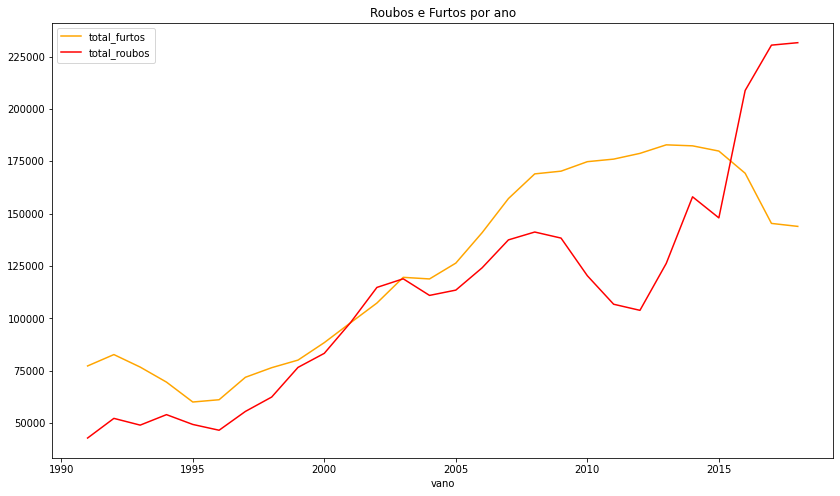

In [ ]:
totais.plot.line(title='Roubos e Furtos por ano', color = ['orange','red'], figsize=(14,8));

Notamos uma forte tendência de crescimento em relação aos crimes de furto e roubo, com o passar dos anos. Após 2015, o número de furtos está em queda, já o número de roubos está em seu pico, dando um salto de 2015 até 2018. 

#### Quais os meses com o maior pico de roubos e furtos?
Os furtos e roubos são mais frequentes em algum mês do ano? Vamos enteder melhor...

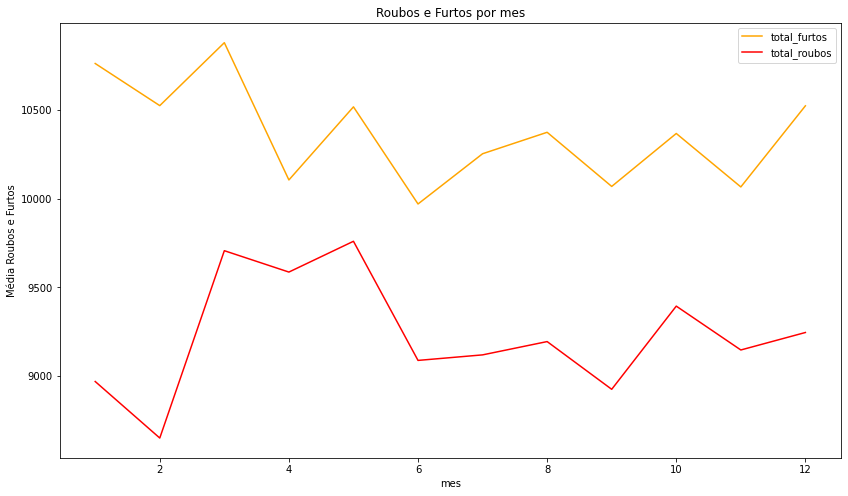

In [ ]:
totais_mes.plot.line(title='Roubos e Furtos por mes', ylabel= 'Média Roubos e Furtos', color = ['orange', 'red'], figsize=(14,8));

Através da média de furtos e roubos ao longo dos meses, conseguimos ver a média de cada crime durante os 12 meses do ano.
Vemos que: 
* Os meses de fevereiro é o mês com menor quantidade do roubos.
* O pico de roubo ocorre durante os meses de março, maio e junho.
* Os furtos começam a subir em dezembro e alcançam seu pico no mês de março.
* Os furtos possuem menor variação ao longo dos meses, em comparação a variação de roubos.
* O mês de março é onde ocorre um pico de furtos e também de roubos.

#### Quais os tipos de roubos e furtos possuem a maior influência no valor total de roubos e furtos ao longo dos anos?

Vamos selecionar apenas as colunas relevantes para nossa comparação. Iniciaremos selecionando as variáveis referentes aos roubos e suas diferentes categorias.

In [ ]:
roubos = df_drop[['roubo_comercio',	'roubo_residencia',	'roubo_veiculo',	'roubo_carga',	'roubo_transeunte',	'roubo_em_coletivo'	,'roubo_banco'	,'roubo_cx_eletronico','roubo_celular','roubo_conducao_saque','roubo_apos_saque','roubo_bicicleta','outros_roubos', 'total_roubos']]


In [ ]:
corr_roubos = roubos.corr()

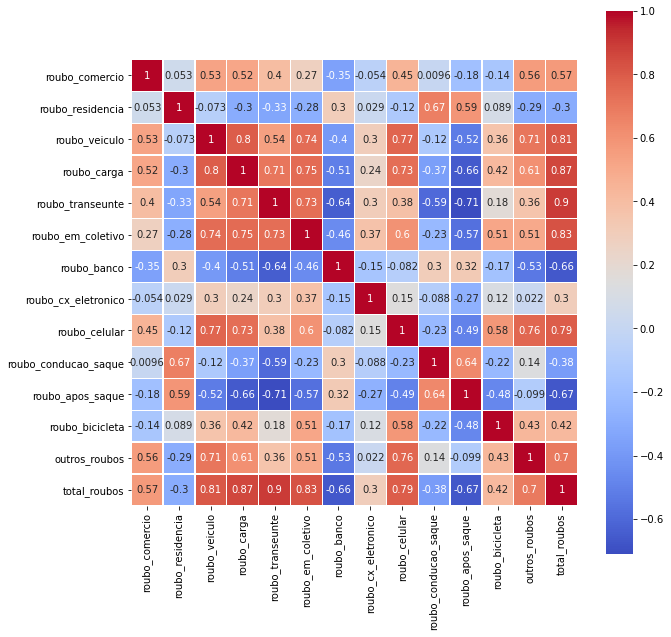

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_roubos, annot=True, cmap = 'coolwarm', square=True, linewidths=0.2);

Agora já temos nossa matriz de correlação, vamos focar na última linha e entender quais os tipos de roubo possuem a maior correlação com total de roubos.

Por motivos obvios, todas as formas de roubos possuem de alguma correlação com o total de roubo, por esse motivo, vamos focar nas 5 variáveis com maior influência na quantidade total de roubos ao longo dos meses e anos. 

As 5 categorias de roubos que mais influenciam o total de roubos durante os meses são:

* Roubo a transeunte
* Roubo de carga
* Roubo em coletivo
* Roubo de veículo
* Roubo de celular



#### Agora vamos analisar quais os tipos de furtos mais contribuem para o total de furtos durante os meses e anos.

In [ ]:
furtos = df_drop[['furto_veiculos',	'furto_transeunte',	'furto_coletivo',	'furto_celular',	'furto_bicicleta',	'outros_furtos',	'total_furtos']]
corr_furtos= furtos.corr()

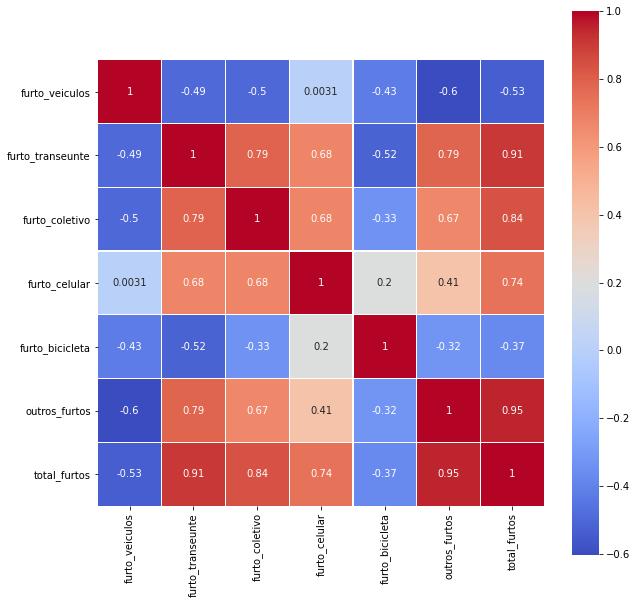

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_furtos, annot=True, cmap = 'coolwarm', square=True, linewidths=0.2);

Analisando a matriz de correlação dos furtos, podemos perceber que as 3 categorias que mais influenciam o número total de furtos durantes os meses são:
* Outros furtos* 
* Furto a transeunte
* Furto em coletivos

## Conclusão

Usando o conjunto de dados fornecidos públicamente através do Portal ISPDados, analisamos alguns indicadores da criminalidade no Estado do Rio de Janeiro.
 
Analisamos os dados estatísticos do nosso dataset. O conjunto de dados está incompleto para o ano de 2019, então, foi necessário uma limpeza nos dados para que nossos resultados fossem os mais claros possíveis.

Nos aprofundamos nos roubos e furtos, vimos que existe um crescimento gigantesco de roubos nos últimos anos, já os furtos, estão em queda. Isso pode indicar que está havendo uma transição de furtos para crimes mais agressivos, como os roubos, algo alarmante. 

Durante nossa analise vimos também as categorias de roubos e furtos que mais influenciam em seus totais. Os transeuntes e pessoas que utilizam transporte coletivos são as que mais sofrem roubos e furtos no estado, lideram os fatores que influenciam a quantidade de roubos totais no estado do Rio de Janeiro. 

Através dessa breve analise, vimos algumas das características da criminalidade do estado do Rio de Janeiro, que nos forneceram informações e insighs sobre a situação do estado. 

